In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np


# Data Preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer


# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concepts_of_AI/Final/Regression/gpu_specs_v6.csv')

# **Data Exploration**

In [4]:
df.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2889 non-null   object 
 1   productName    2889 non-null   object 
 2   releaseYear    2845 non-null   float64
 3   memSize        2477 non-null   float64
 4   memBusWidth    2477 non-null   float64
 5   gpuClock       2889 non-null   int64  
 6   memClock       2477 non-null   float64
 7   unifiedShader  2065 non-null   float64
 8   tmu            2889 non-null   int64  
 9   rop            2889 non-null   int64  
 10  pixelShader    824 non-null    float64
 11  vertexShader   824 non-null    float64
 12  igp            2889 non-null   object 
 13  bus            2889 non-null   object 
 14  memType        2889 non-null   object 
 15  gpuChip        2889 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 361.2+ KB


In [6]:
df.describe()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader
count,2845.000000,2477.000000,2477.000000,2889.000000,2477.000000,2065.000000,2889.000000,2889.000000,824.000000,824.000000
mean,2010.691388,3.113803,274.874445,661.126687,868.578119,1032.937530,47.429214,18.750087,6.739078,2.622573
std,6.193125,7.175399,653.163896,374.481450,509.987396,1662.834618,73.014849,25.067896,8.091586,2.579388
min,1986.000000,0.000032,32.000000,10.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.256000,128.000000,400.000000,400.000000,144.000000,8.000000,4.000000,2.000000,0.000000
50%,2011.000000,1.024000,128.000000,600.000000,837.000000,384.000000,20.000000,8.000000,4.000000,2.000000
75%,2015.000000,3.000000,256.000000,875.000000,1250.000000,1280.000000,56.000000,24.000000,8.000000,4.000000
max,2023.000000,128.000000,8192.000000,2331.000000,2257.000000,17408.000000,880.000000,256.000000,48.000000,24.000000


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 manufacturer        0
productName         0
releaseYear        44
memSize           412
memBusWidth       412
gpuClock            0
memClock          412
unifiedShader     824
tmu                 0
rop                 0
pixelShader      2065
vertexShader     2065
igp                 0
bus                 0
memType             0
gpuChip             0
dtype: int64


In [8]:
# Checking for duplicates
duplicates_before = df.duplicated().sum()
print("Duplicates rows before dropping: ",duplicates_before)

Duplicates rows before dropping:  32


In [9]:
df.shape

(2889, 16)

# **Data Visualization**

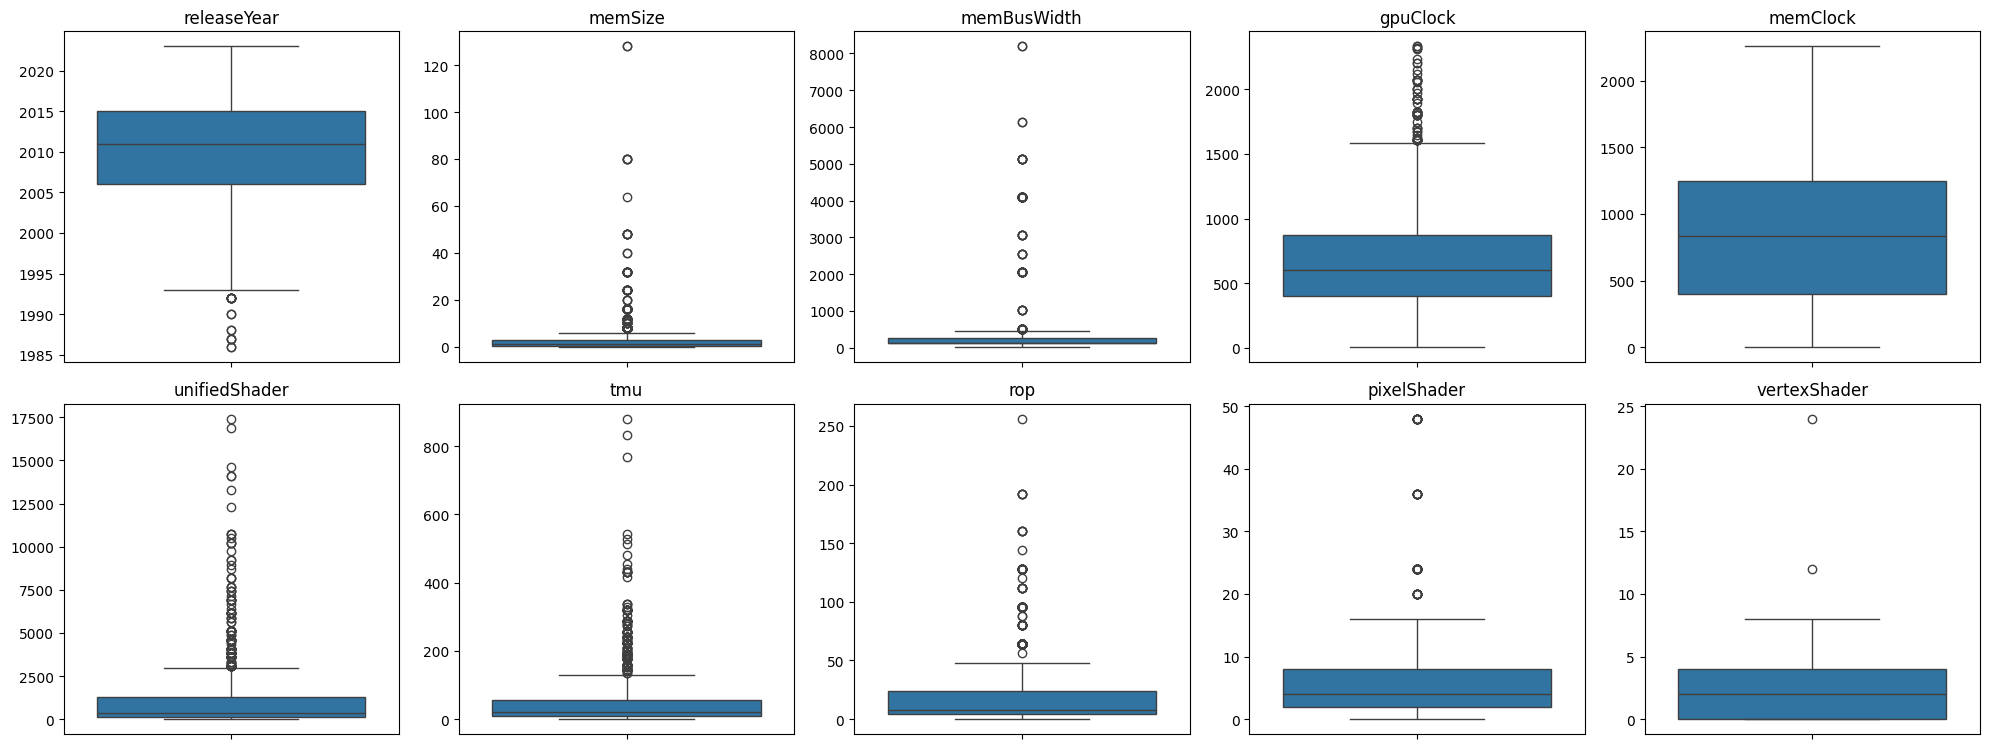

In [10]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplot
n_rows = 4
n_cols = 5

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.ravel()  # Ravel turns a matrix into a flat array, which makes it easier to iterate

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    if i < len(axes):  # Check to make sure we don't go out of bounds
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_ylabel('')

# Hide any empty subplot areas
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

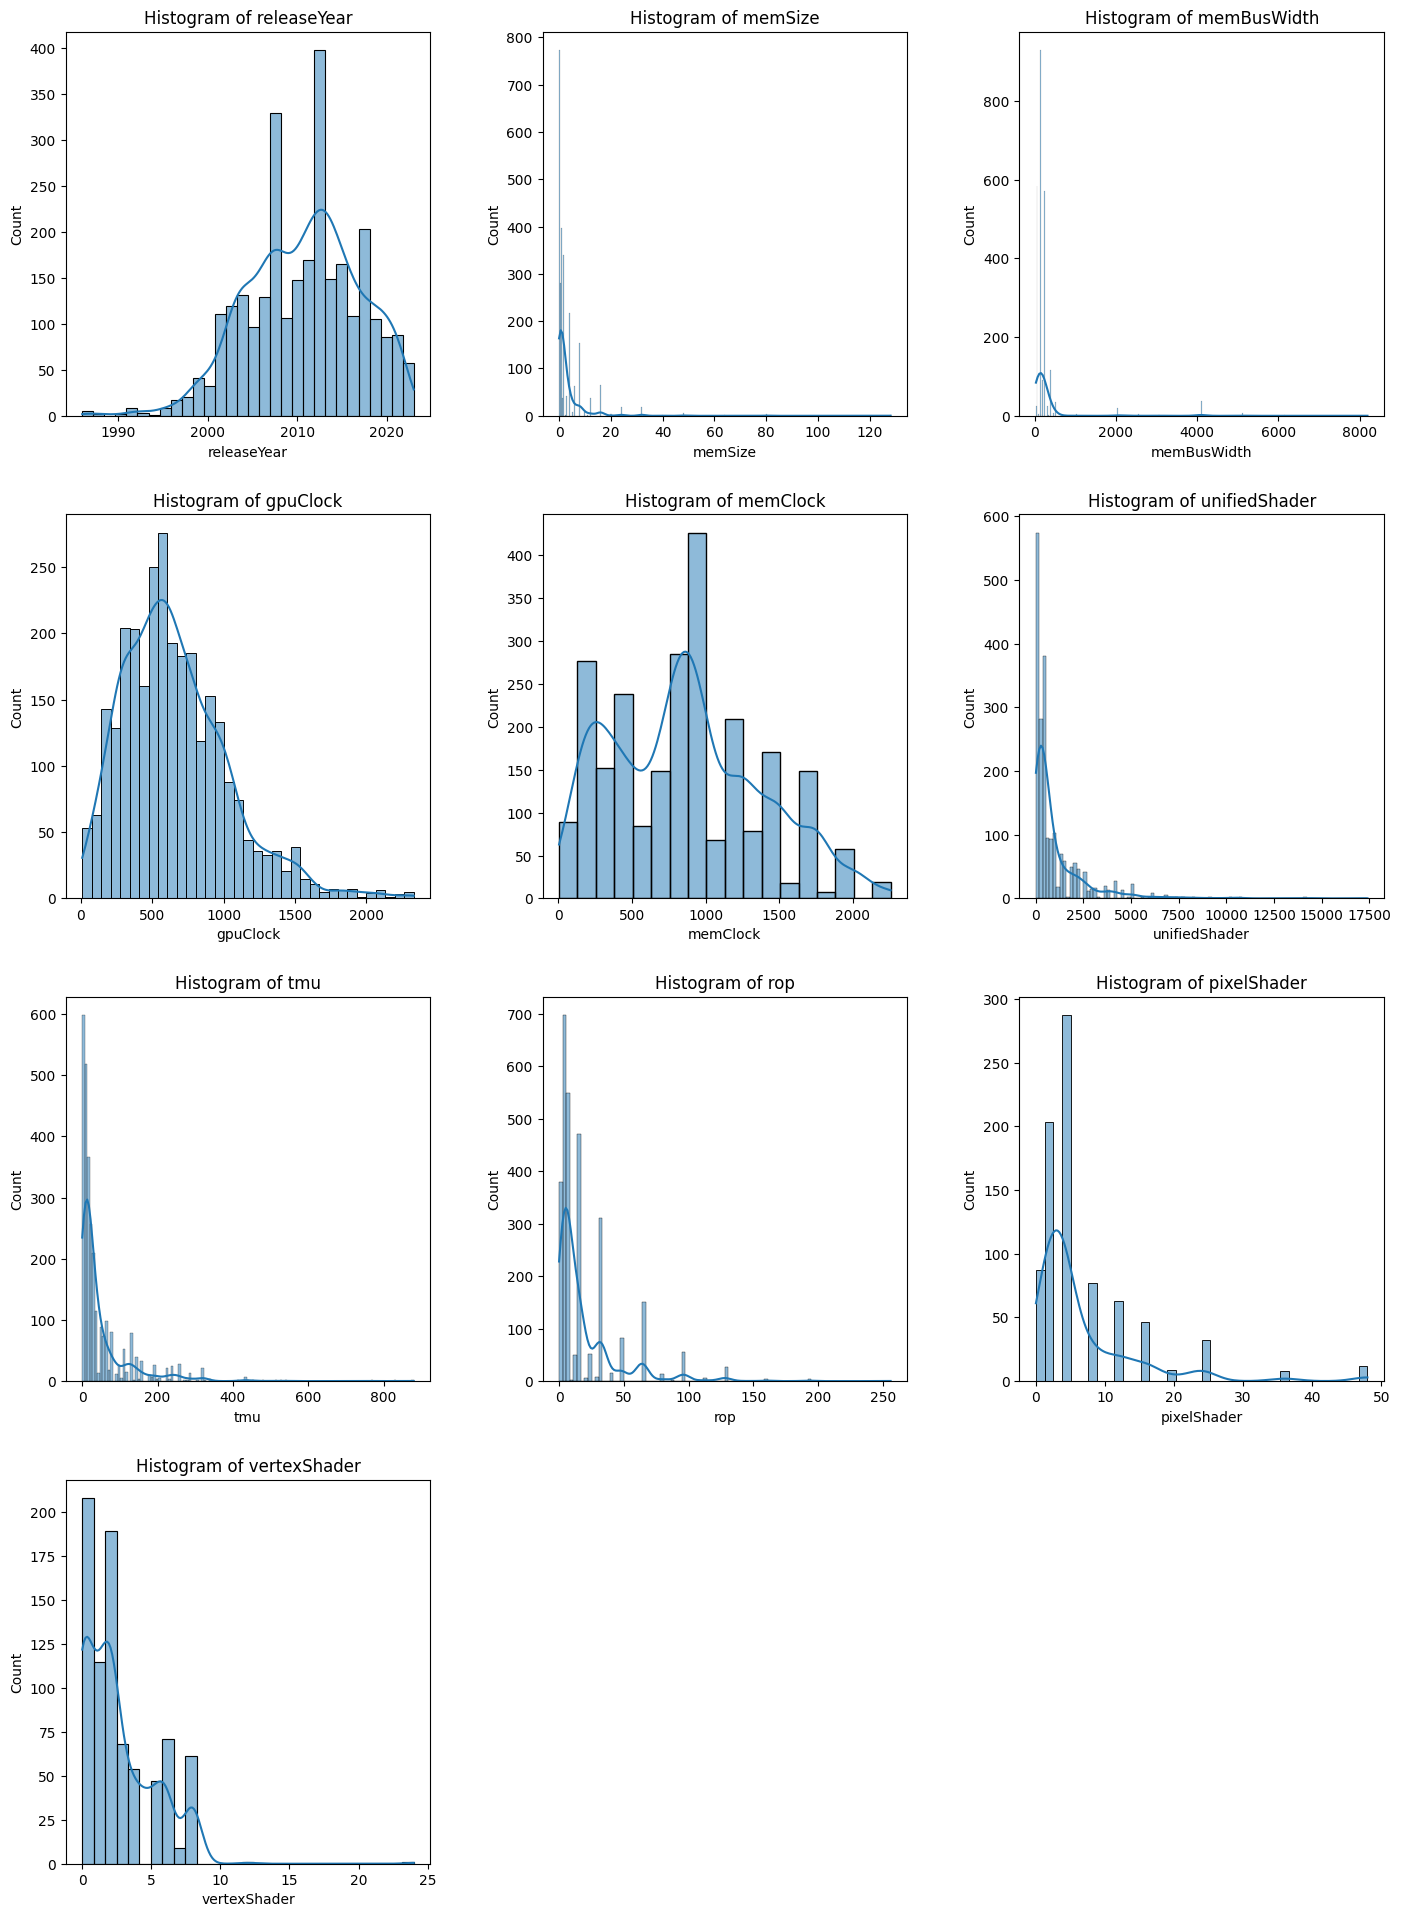

In [11]:
# Number of rows/columns for the subplot grid
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.tight_layout(pad=5.0)

# Plot histograms for numeric columns in a grid
for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_index = i % n_cols
    sns.histplot(df[col], kde=True, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Histogram of {col}')
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel('Count')

# Adjust if the number of numeric columns is not a multiple of grid size
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

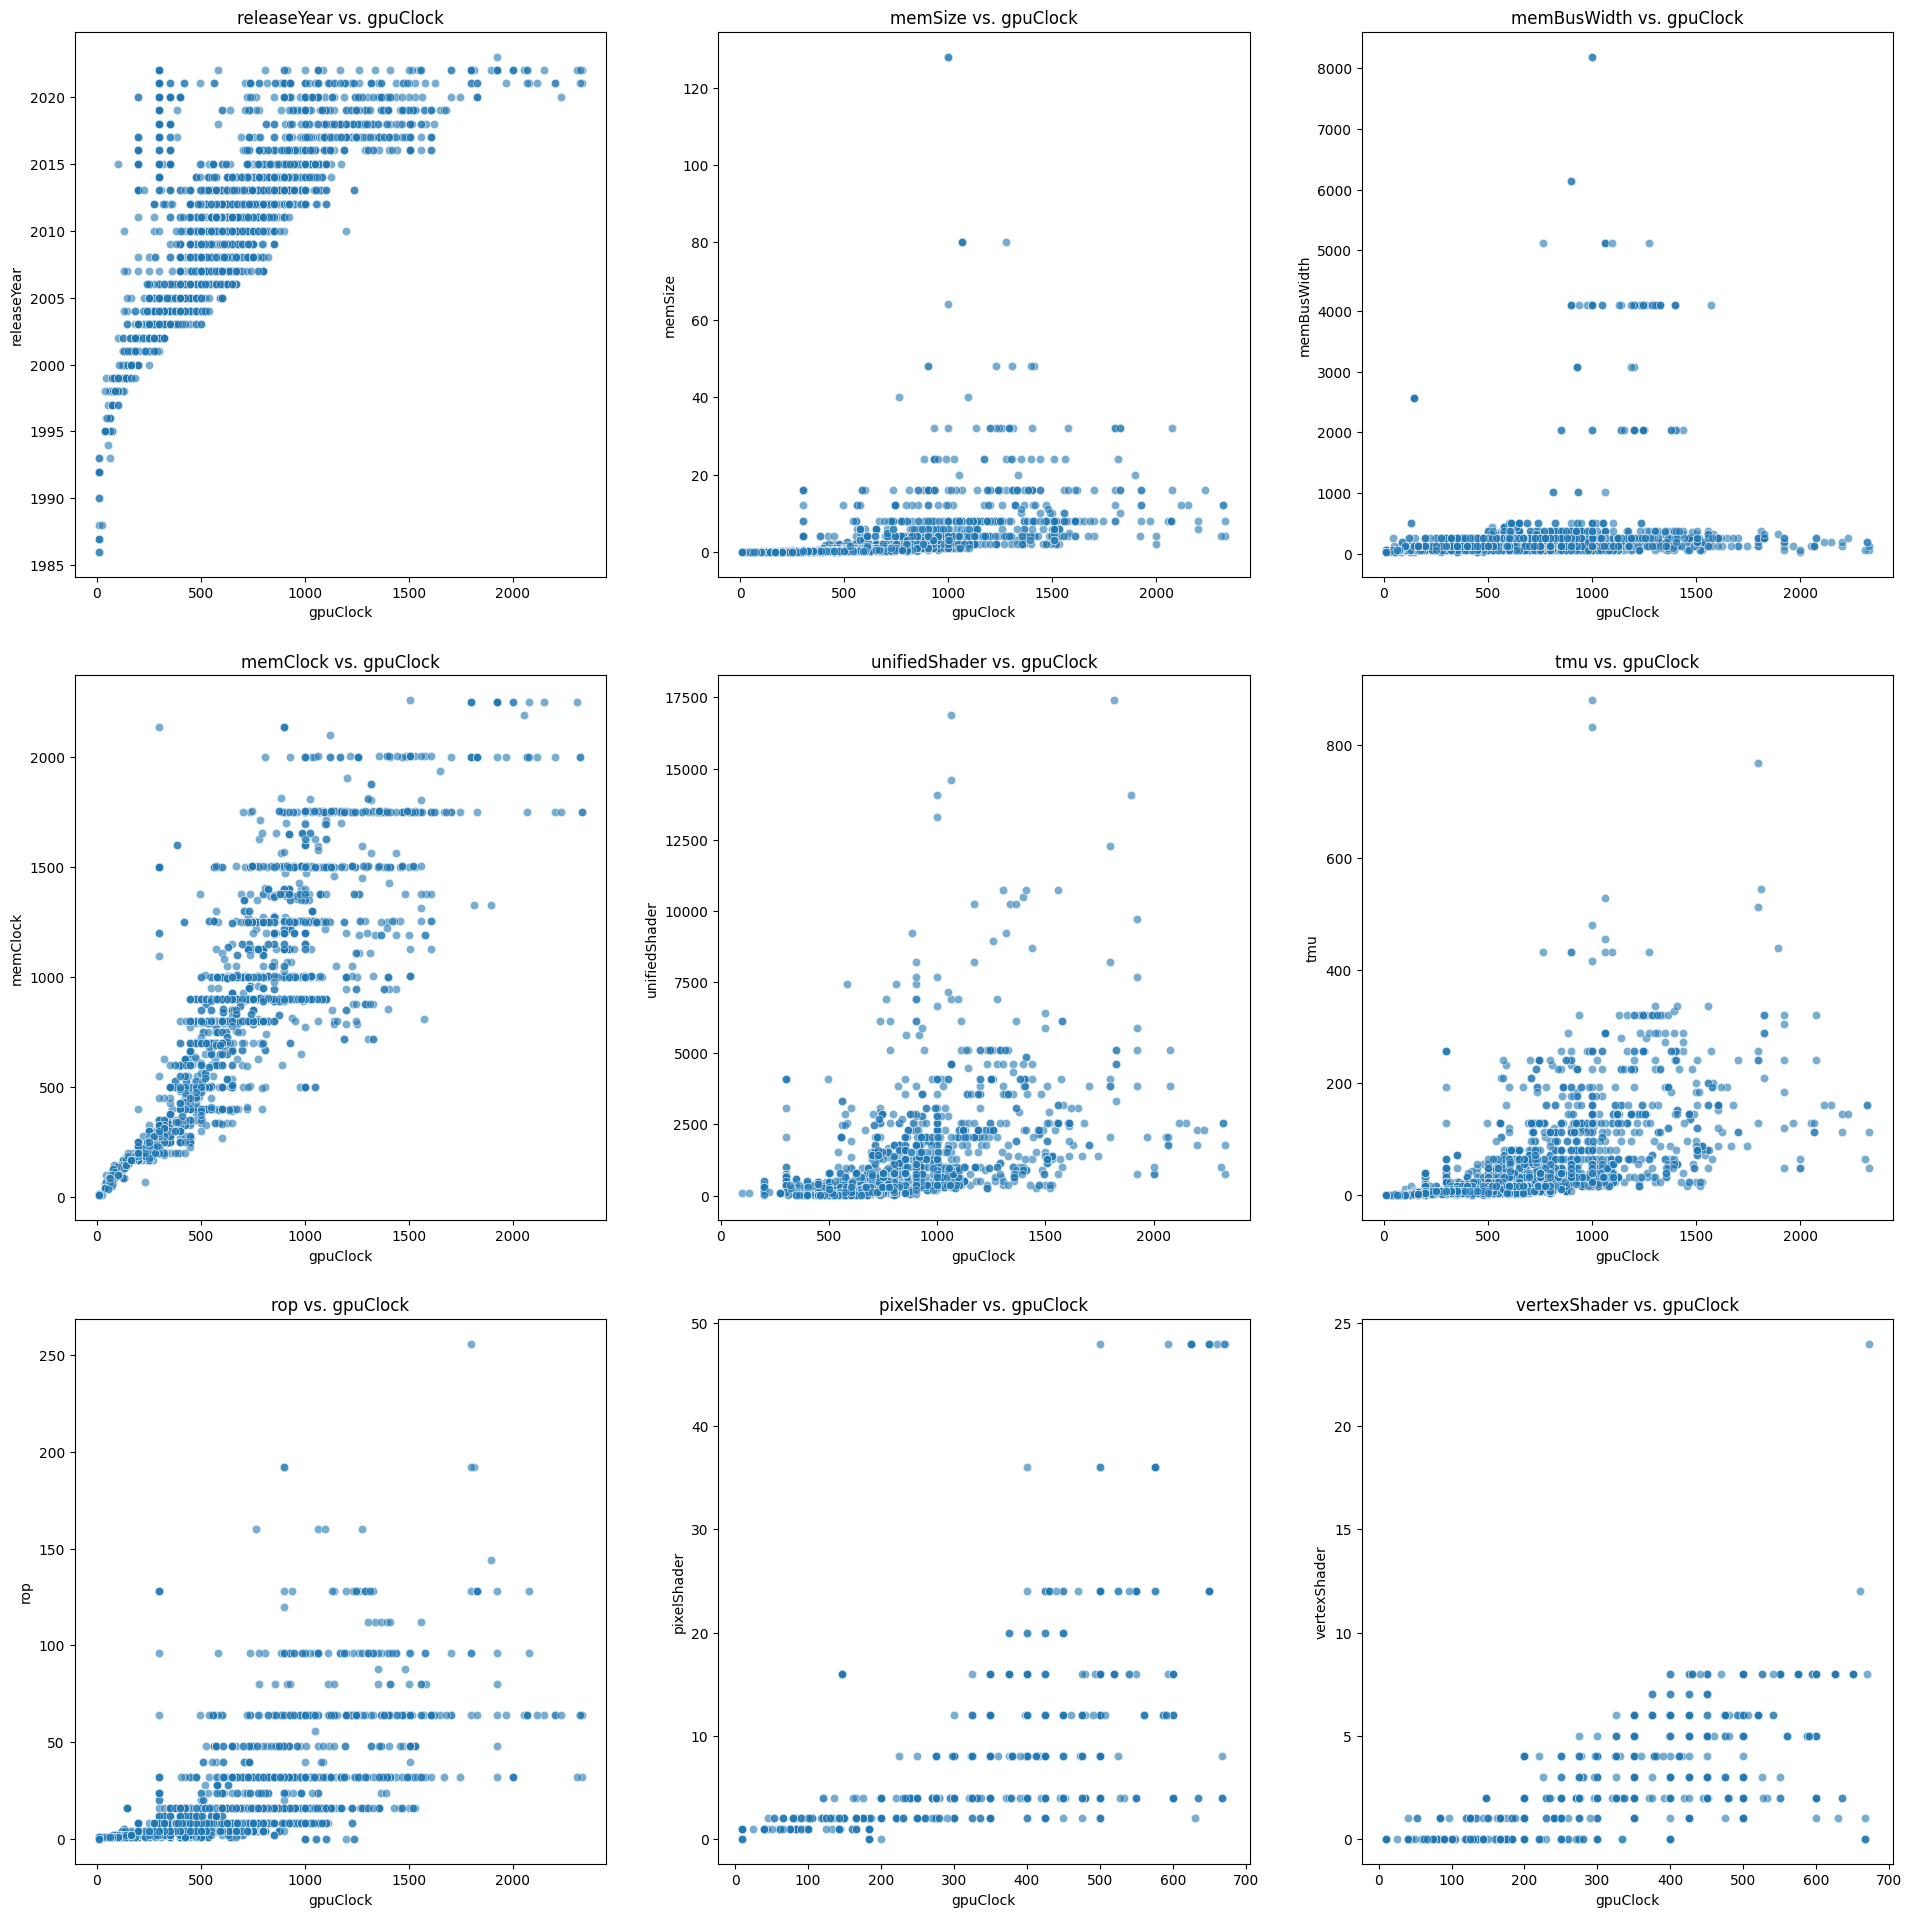

In [12]:
# Identify numeric columns excluding 'gpuClock'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('gpuClock')

# Determine the size of the grid
grid_size = 3  # For a 4x4 grid

# Calculate total number of subplots needed
num_plots = len(numeric_cols)

# Create figure and axes for subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through numeric columns and create scatter plots
for i, col in enumerate(numeric_cols):
    # Skip plotting if we have more columns than slots in the grid
    if i >= grid_size**2:
        break
    sns.scatterplot(x=df['gpuClock'], y=df[col], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} vs. gpuClock')
    axes[i].set_xlabel('gpuClock')
    axes[i].set_ylabel(col)

# Hide any unused subplot areas
for i in range(num_plots, grid_size**2):
    fig.delaxes(axes[i])

plt.show()

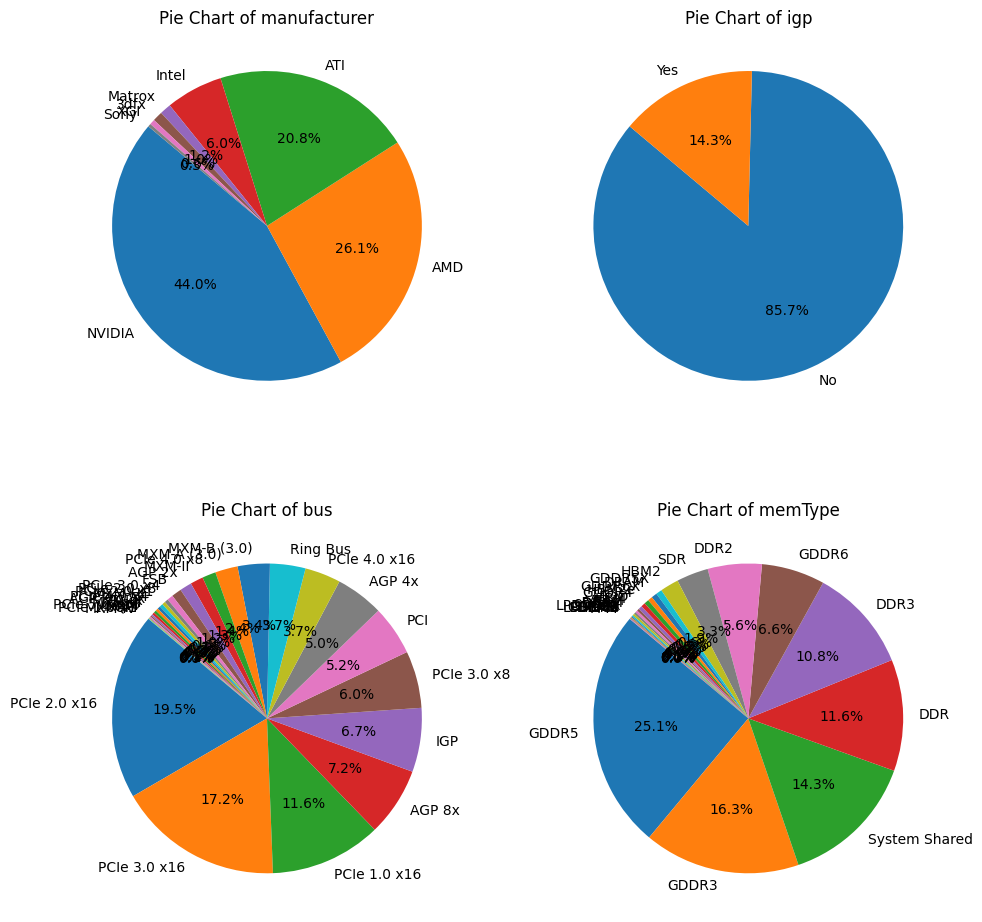

In [13]:
categorical_cols = ['manufacturer', 'igp', 'bus', 'memType']

# Setting up the figure for a 2x2 grid of pie charts
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for easy indexing

# Plot pie charts for each categorical column
for i, col in enumerate(categorical_cols):
    values = df[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Pie Chart of {col}')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

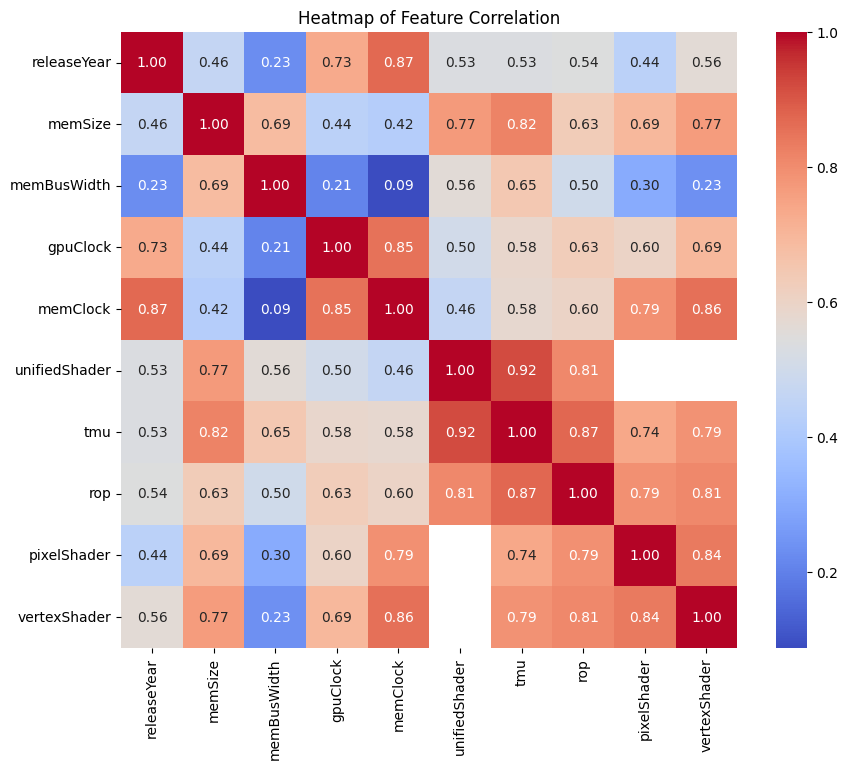

In [14]:
# Calculate the correlation matrix
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title('Heatmap of Feature Correlation')
plt.show()

# **Data Cleaning and Preprocessing**

# Data cleaning

In [15]:
# Dropping duplicates
df = df.drop_duplicates()

In [16]:
# Assume 'gpuClock' is the target variable
X = df.drop('gpuClock', axis=1)
y = df['gpuClock']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Assuming 'gpuClock' is the numerical target and we have predefined categorical_columns
categorical_features = ['manufacturer', 'igp', 'bus', 'memType', 'gpuChip']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
# Calculate IQR for each numerical column
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Determine a threshold for outliers
threshold = 1.5

# Identify rows with outliers
outliers = (df[numerical_features] < (Q1 - threshold * IQR)) | (df[numerical_features] > (Q3 + threshold * IQR))

# Remove outliers
df = df[~(outliers.any(axis=1))]


In [19]:
df.shape

(2384, 16)

# Data Preprocessing

In [20]:
# Preprocessing for numerical data: impute then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [21]:
# For categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [22]:
# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

In [23]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Model training and evaluation
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    # Training
    pipeline.fit(X_train, y_train)
    # Prediction
    preds = pipeline.predict(X_test)
    train_preds = pipeline.predict(X_train)
    # Evaluation for Test
    rmse_test = mean_squared_error(y_test, preds, squared=False)
    r2_test = r2_score(y_test, preds)
    # Evaluation for Training
    rmse_train = mean_squared_error(y_train, train_preds, squared=False)
    r2_train = r2_score(y_train, train_preds)

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)  # Convert to RMSE
    mean_cv_rmse = np.mean(cv_rmse_scores)
    std_cv_rmse = np.std(cv_rmse_scores)

    print(f"{name}: \n")
    print(f" Training RMSE = {rmse_train:.2f}, R-squared = {r2_train:.2f}")
    print(f" Test RMSE = {rmse_test:.2f}, R-squared = {r2_test:.2f}\n")
    print(f" CV RMSE = {mean_cv_rmse:.2f} ± {std_cv_rmse:.2f}\n")
    print("-"*60)


Linear Regression: 

 Training RMSE = 95.50, R-squared = 0.93
 Test RMSE = 129.89, R-squared = 0.88

 CV RMSE = 153.99 ± 11.15

------------------------------------------------------------
Decision Tree: 

 Training RMSE = 38.31, R-squared = 0.99
 Test RMSE = 149.67, R-squared = 0.84

 CV RMSE = 148.17 ± 9.41

------------------------------------------------------------
Random Forest: 

 Training RMSE = 55.76, R-squared = 0.98
 Test RMSE = 111.96, R-squared = 0.91

 CV RMSE = 125.46 ± 10.34

------------------------------------------------------------
Gradient Boosting: 

 Training RMSE = 120.14, R-squared = 0.90
 Test RMSE = 127.41, R-squared = 0.89

 CV RMSE = 139.71 ± 7.72

------------------------------------------------------------


# **Hyperparameter tuning and Feature selection**

In [26]:
# Parameter grids for each model, using distributions for RandomizedSearchCV
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

param_distributions = {
    "Linear Regression": {'model__fit_intercept': [True, False]},
    "Decision Tree": {'model__max_depth': [None, 10, 20, 30], 'model__min_samples_split': [2, 5, 10], 'model__min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10], 'model__min_samples_leaf': [1, 2, 4]},
    "Gradient Boosting": {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10], 'model__min_samples_leaf': [1, 2, 4]}
}

# Loop through each model to perform hyperparameter tuning
# Loop through models to train and evaluate
for model_name, model in models.items():
    print(f"\nProcessing {model_name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('feature_selection', SelectKBest(score_func=f_regression, k=8)),
                               ('model', model)])

    rscv = RandomizedSearchCV(estimator=pipeline,
                              param_distributions=param_distributions[model_name],
                              n_iter=10, cv=5,
                              scoring='neg_mean_squared_error',
                              random_state=42)

    newmodel = rscv.fit(X_train, y_train)

    # Evaluate on the training set
    y_train_pred = rscv.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = rscv.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)  # Convert to RMSE
    mean_cv_rmse = np.mean(cv_rmse_scores)
    std_cv_rmse = np.std(cv_rmse_scores)

    print(f"\nBest parameters: {rscv.best_params_}\n")
    print(f"Training - RMSE: {train_rmse:.2f}, R2: {train_r2:.2f}")
    print(f"Test - RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}\n")
    print(f" CV RMSE = {mean_cv_rmse:.2f} ± {std_cv_rmse:.2f}\n")


    # Calculate RMSE for each cross-validated fold's test set
    rmse_scores = np.sqrt(-1 * rscv.cv_results_['mean_test_score'])

    # Display RMSE for each hyperparameterized iteration
    for iteration, rmse in enumerate(rmse_scores, start=1):
        print(f"Iteration {iteration}: RMSE = {rmse:.4f}")

    # Calculate and display the average RMSE across all iterations
    average_rmse = np.mean(rmse_scores)
    print(f"\nAverage accuracy (RMSE) across iterations: {average_rmse:.4f}")
    print("-" * 60)






Processing Linear Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best parameters: {'model__fit_intercept': True}

Training - RMSE: 206.38, R2: 0.70
Test - RMSE: 189.14, R2: 0.75

 CV RMSE = 206.81 ± 5.63

Iteration 1: RMSE = 206.8907
Iteration 2: RMSE = 577.8878

Average accuracy (RMSE) across iterations: 392.3892
------------------------------------------------------------

Processing Decision Tree...

Best parameters: {'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 10}

Training - RMSE: 114.90, R2: 0.91
Test - RMSE: 133.55, R2: 0.87

 CV RMSE = 181.25 ± 11.19

Iteration 1: RMSE = 161.5885
Iteration 2: RMSE = 165.2158
Iteration 3: RMSE = 161.6479
Iteration 4: RMSE = 170.0578
Iteration 5: RMSE = 161.6132
Iteration 6: RMSE = 166.7246
Iteration 7: RMSE = 168.5893
Iteration 8: RMSE = 165.6032
Iteration 9: RMSE = 161.5885
Iteration 10: RMSE = 161.3385

Average accuracy (RMSE) across iterations: 164.3967
------------------------------------------------------------

Processing Random Forest...

Best parameters: {'model_

# Conclusion

The Random Forest model is the best choice for this dataset due to its superior test performance with the lowest RMSE (142.61) and highest R2 score (0.90), indicating high predictive accuracy and variance explanation. It demonstrates stable and robust performance across iterations with a reasonable cross-validation RMSE, balancing bias and variance effectively, making it highly reliable and generalizable to unseen data.

While Gradient Boosting perform really well for the selected features, the variation of RMSE scores accross various sets show some inconsistency.

# Feature-selection performance-drop conclusion

Using "SelectFromModel" with a RandomForestRegressor to select features can drop the performance of Linear Regression and Decision Tree models due to differences in model assumptions, structures, and how they evaluate feature importance. The selected features might be highly suited to the complex, ensemble-based approach of RandomForest but not necessarily to the simpler, more assumption-driven approaches of Linear Regression and Decision Trees.